In [510]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import seaborn as sns
import re
import os

# Task 2

In [511]:
# Read the files
task1_path = Path.cwd() / 'resources' / 'task_2'
df_properties = pd.read_csv(task1_path / 'reference_properties.tsv', sep='\t')
df_rfq = pd.read_csv(task1_path / 'rfq.csv')

In [512]:
df_rfq

,id,grade,grade_suffix,coating,finish,surface_type,surface_protection,form,thickness_min,thickness_max,...,weight_min,weight_max,inner_diameter_min,inner_diameter_max,outer_diameter_min,outer_diameter_max,yield_strength_min,yield_strength_max,tensile_strength_min,tensile_strength_max
0,8aff426d-b8c0-43aa-ad26-835ef4de6129,S700MC,NaN,NaN,Oiled,NaN,NaN,Coils,6.00,6.0,...,15000.0,25000.0,610.0,610.0,NaN,NaN,NaN,NaN,760.0,810.0
1,37e624be-b125-464f-85b6-1838530193ef,S250GD,NaN,ZM310,Hot-dip zinc magnesium (+ZM),NaN,NaN,Slit Coils,1.50,1.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b8257184-6307-46ab-b06e-d979336d1263,DX51D,NaN,Z100,Hot-dip Galvanized (+Z/+GI),NaN,Lightly Oiled (L),Coils,0.40,0.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,63140d1f-dda8-40fe-8931-bcaba65d5772,S235,NaN,NaN,NaN,NaN,NaN,Round Tubes,1.50,1.5,...,53800.0,53800.0,NaN,NaN,60.3,NaN,NaN,NaN,NaN,NaN
4,11cffc57-44be-4d79-bfd5-97482be566d3,S235,NaN,NaN,NaN,NaN,NaN,Round Tubes,1.50,1.5,...,14500.0,14500.0,NaN,NaN,48.3,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,7a965ba4-be4e-4833-a723-1f98ed1f24ac,DX51D,NaN,Z080,Hot-dip Galvanized (+Z/+GI),NaN,NaN,Coils,0.55,0.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,82fc492f-0adc-49bd-8458-69bb1f0f318e,DD11,NaN,NaN,Hot Rolled,NaN,Pickled and Oiled,Coils,NaN,NaN,...,NaN,25000.0,610.0,610.0,NaN,NaN,NaN,NaN,NaN,NaN
997,d3db6f2f-6218-4612-8a63-c26d4ac69658,S550MC,NaN,NaN,Hot Rolled,NaN,Pickled and Oiled,Coils,3.40,3.6,...,25000.0,35000.0,610.0,610.0,NaN,NaN,NaN,NaN,NaN,NaN
998,90b02a62-3da9-4648-948c-52627d086a50,DD11,NaN,NaN,Hot Rolled,NaN,Pickled and Oiled,Coils,2.40,2.6,...,20000.0,25000.0,610.0,610.0,NaN,NaN,NaN,NaN,NaN,NaN


In [513]:
# rename propertires columns
column_mapping = {
    'Standards': 'standards',
    'Carbon (C)': 'carbon_C',
    'Manganese (Mn)': 'manganese_Mn', 
    'Silicon (Si)': 'silicon_Si',
    'Sulfur (S)': 'sulfur_S',
    'Phosphorus (P)': 'phosphorus_P',
    'Chromium (Cr)': 'chromium_Cr',
    'Nickel (Ni)': 'nickel_Ni',
    'Molybdenum (Mo)': 'molybdenum_Mo',
    'Vanadium (V)': 'vanadium_V',
    'Aluminum (Al)': 'aluminum_Al',
    'Titanium (Ti)': 'titanium_Ti',
    'Niobium (Nb)': 'niobium_Nb',
    'Boron (B)': 'boron_B',
    'Nitrogen (N)': 'nitrogen_N',
    'Tensile strength (Rm)': 'tensile_strength_Rm',
    'Yield strength (Re or Rp0.2)': 'yield_strength_RE_RP0.2', 
    'Elongation (A%)': 'elongation_A%',
    'Hardness (HB, HV, HRC)': 'hardness_HB_HV_HRC',
    'Impact toughness (Charpy V-notch)': 'impact_toughness_Charpy_V_notch',
    'Source_Pages': 'source_pages',
    'Application': 'application',
    'Category': 'category',
    'Nb + V + Ti (Others)': 'Nb_V_Ti_others',
    'Coating': 'coating'
}

df_properties = df_properties.rename(columns=column_mapping)

### Fix inconsistencies in grade

In [514]:
# Fix inconsistencies in grade
df_properties['Grade/Material'] = df_properties['Grade/Material'].replace({
    'HC380La': 'HC380LA',
    '26Mnb5': '26MnB5',
    'CR440Y780T DP': 'CR440Y780T-DP'
})

df_rfq['grade'] = df_rfq['grade'].replace({
    'HC380La': 'HC380LA',
    '26Mnb5': '26MnB5',
    'CR440Y780T DP': 'CR440Y780T-DP'
})

# Drop duplicates
df_properties = df_properties.drop_duplicates(subset=['Grade/Material'], keep='first')


In [515]:
# join datasets
df_merged = df_rfq.merge(
    df_properties, 
    left_on='grade',          
    right_on='Grade/Material', 
    how='left'
)

In [516]:
# check for missing grades matches
matches_found = False
for i in range(len(df_merged)):
    if df_merged.loc[i, 'grade'] is not np.nan and pd.isna(df_merged.loc[i, 'Grade/Material']):
        print(f"Row {i} has no match: {df_merged.loc[i, 'grade']}")
        matches_found = True

if not matches_found:
    print("All grades in rfq have a match in reference_properties.")
    df_merged.drop(columns=['Grade/Material'], inplace=True)

All grades in rfq have a match in reference_properties.


In [517]:
# Drop rows with missing grades
df_merged = df_merged.dropna(subset=['grade'])

# Drop empty columns
empty_cols = df_merged.columns[df_merged.isnull().all()].tolist()
df_merged = df_merged.drop(columns=empty_cols)

# Drop uninformative or wrong columns
cols_to_drop = ["height_max"]
df_merged = df_merged.drop(columns=cols_to_drop)

# Fix wrong column naming (height_min should be length_max)
df_merged = df_merged.rename(columns={'height_min': 'length_max'})

### Process Categorical Variables.  

Assumptions:
- missing values refers to standard features or to missing additional processing. Hence I set these empty values equal to None



In [518]:
# Set missing data categorical columns as 'N/A'
categorical_cols = ["surface_protection", "coating_x", "form", "surface_type", "finish"]
for col in categorical_cols:
    df_merged.loc[df_merged[col].isna(), col] = 'None'

### Process Grade Properites

- When a biund is found, I set this equal to min and max

In [519]:
cols_with_ranges = [
    'carbon_C',
    'manganese_Mn',
    'silicon_Si',
    'sulfur_S',
    'phosphorus_P',
    'chromium_Cr',
    'nickel_Ni',
    'molybdenum_Mo',
    'vanadium_V',
    'aluminum_Al',
    'titanium_Ti',
    'niobium_Nb',
    'boron_B',
    'nitrogen_N',
    'tensile_strength_Rm',
    'yield_strength_RE_RP0.2',
    'elongation_A%',
    'hardness_HB_HV_HRC',
    'Nb_V_Ti_others'
]


In [520]:
def extract_ranges(col_name):
    mid_col_name = f"{col_name}_mid"  
    df_merged[mid_col_name] = np.nan  
    
    for row in range(len(df_merged)):
        value = df_merged.iloc[row][col_name]
        if pd.isna(value):
            continue
        
        value_str = str(value).strip()
        value_str_clean = re.sub(r"[^\d.\-<≥>≤]", "", value_str)
        
        if '-' in value_str_clean:
            parts = value_str_clean.split('-')
            try:
                low, high = float(parts[0]), float(parts[1])
                df_merged.loc[df_merged.index[row], mid_col_name] = (low + high) / 2 
            except ValueError:
                pass
        
        elif '<' in value_str_clean or '≤' in value_str_clean or '>' in value_str_clean or '≥' in value_str_clean:
            try:
                num_value = float(value_str_clean.replace('<', '').replace('≤', '').replace('>', '').replace('≥', '').strip())
                df_merged.loc[df_merged.index[row], mid_col_name] = num_value  
            except ValueError:
                pass
        else:
            df_merged.loc[df_merged.index[row], mid_col_name] = np.nan  
            print(f"Unexpected value format: {value} found in variable {col_name} at row {row}")

for col in cols_with_ranges:
    extract_ranges(col)

Unexpected value format: Variable found in variable carbon_C at row 722
Unexpected value format: Variable found in variable manganese_Mn at row 722
Unexpected value format: 0.50 found in variable silicon_Si at row 589
Unexpected value format: Variable found in variable silicon_Si at row 722
Unexpected value format: 415 MPa found in variable tensile_strength_Rm at row 589
Unexpected value format: Variable found in variable tensile_strength_Rm at row 722
Unexpected value format: 205 MPa found in variable yield_strength_RE_RP0.2 at row 589


### Process Dimensions

Approach
- There are 138 missing data for forms. I tried to input some of them by using inner_diameter_min which is a dimension existent only for Coils, Strpis, and Slit Coils. However, it is not clear to which of these 3 groups should the missing values be inputted. I furtherly assessed the 'width_min' dimension to look for informative variables as I thought it could help discriminate between different coils types. Also here a found hogh variability and gived up this approach.
- I choose to input 


In [521]:
# assess misisng values

print(df_merged.loc[df_merged['thickness_min'].isna(), "form"].value_counts())

form
Coils                72
None                 26
Round Bars           12
Strips               10
Slit Coils            9
Sheets                3
I-Sections            3
H-Sections            2
Rectangular Tubes     1
Name: count, dtype: int64


In [522]:
# Fix outer_diameter values

# outer_diameter = 610.0 is a mistake, it should be inner_diameter 
mask = df_merged['form'][df_merged['outer_diameter_min'] == 610.0].index
df_merged.loc[mask, ['inner_diameter_min', 'inner_diameter_max']] = 610.0
df_merged.loc[mask, ['outer_diameter_min', 'outer_diameter_max']] = np.nan

# Set threshold for outer diameter
threshold = 2000
mask = df_merged['form'][df_merged['outer_diameter_min'] > threshold].index
df_merged.loc[mask, ['outer_diameter_min', 'outer_diameter_max']] = np.nan

In [523]:
# Inputting missing values for inner_diameter_min and inner_diameter_max
print('- Inspecting inner_diameter_min values equal to 610.0')
print(df_merged.loc[df_merged['inner_diameter_min'] == 610.0, "form"].value_counts())
print('\n- Values with inner_diameter_min equal to 610.0 are only Coils, Slit Coils, and Strips.\n--> I decided to impute inner_diameter missing values for these 3 forms with 610.0')

inner_diameter_mask = (df_merged['form'].isin(['Coils', 'Slit Coils', 'Strips']) & 
        df_merged['inner_diameter_min'].isna())

df_merged.loc[inner_diameter_mask, 'inner_diameter_min'] = 610
df_merged.loc[inner_diameter_mask, 'inner_diameter_max'] = 610

- Inspecting inner_diameter_min values equal to 610.0
form
Coils         156
None           16
Slit Coils     11
Strips          5
Name: count, dtype: int64

- Values with inner_diameter_min equal to 610.0 are only Coils, Slit Coils, and Strips.
--> I decided to impute inner_diameter missing values for these 3 forms with 610.0


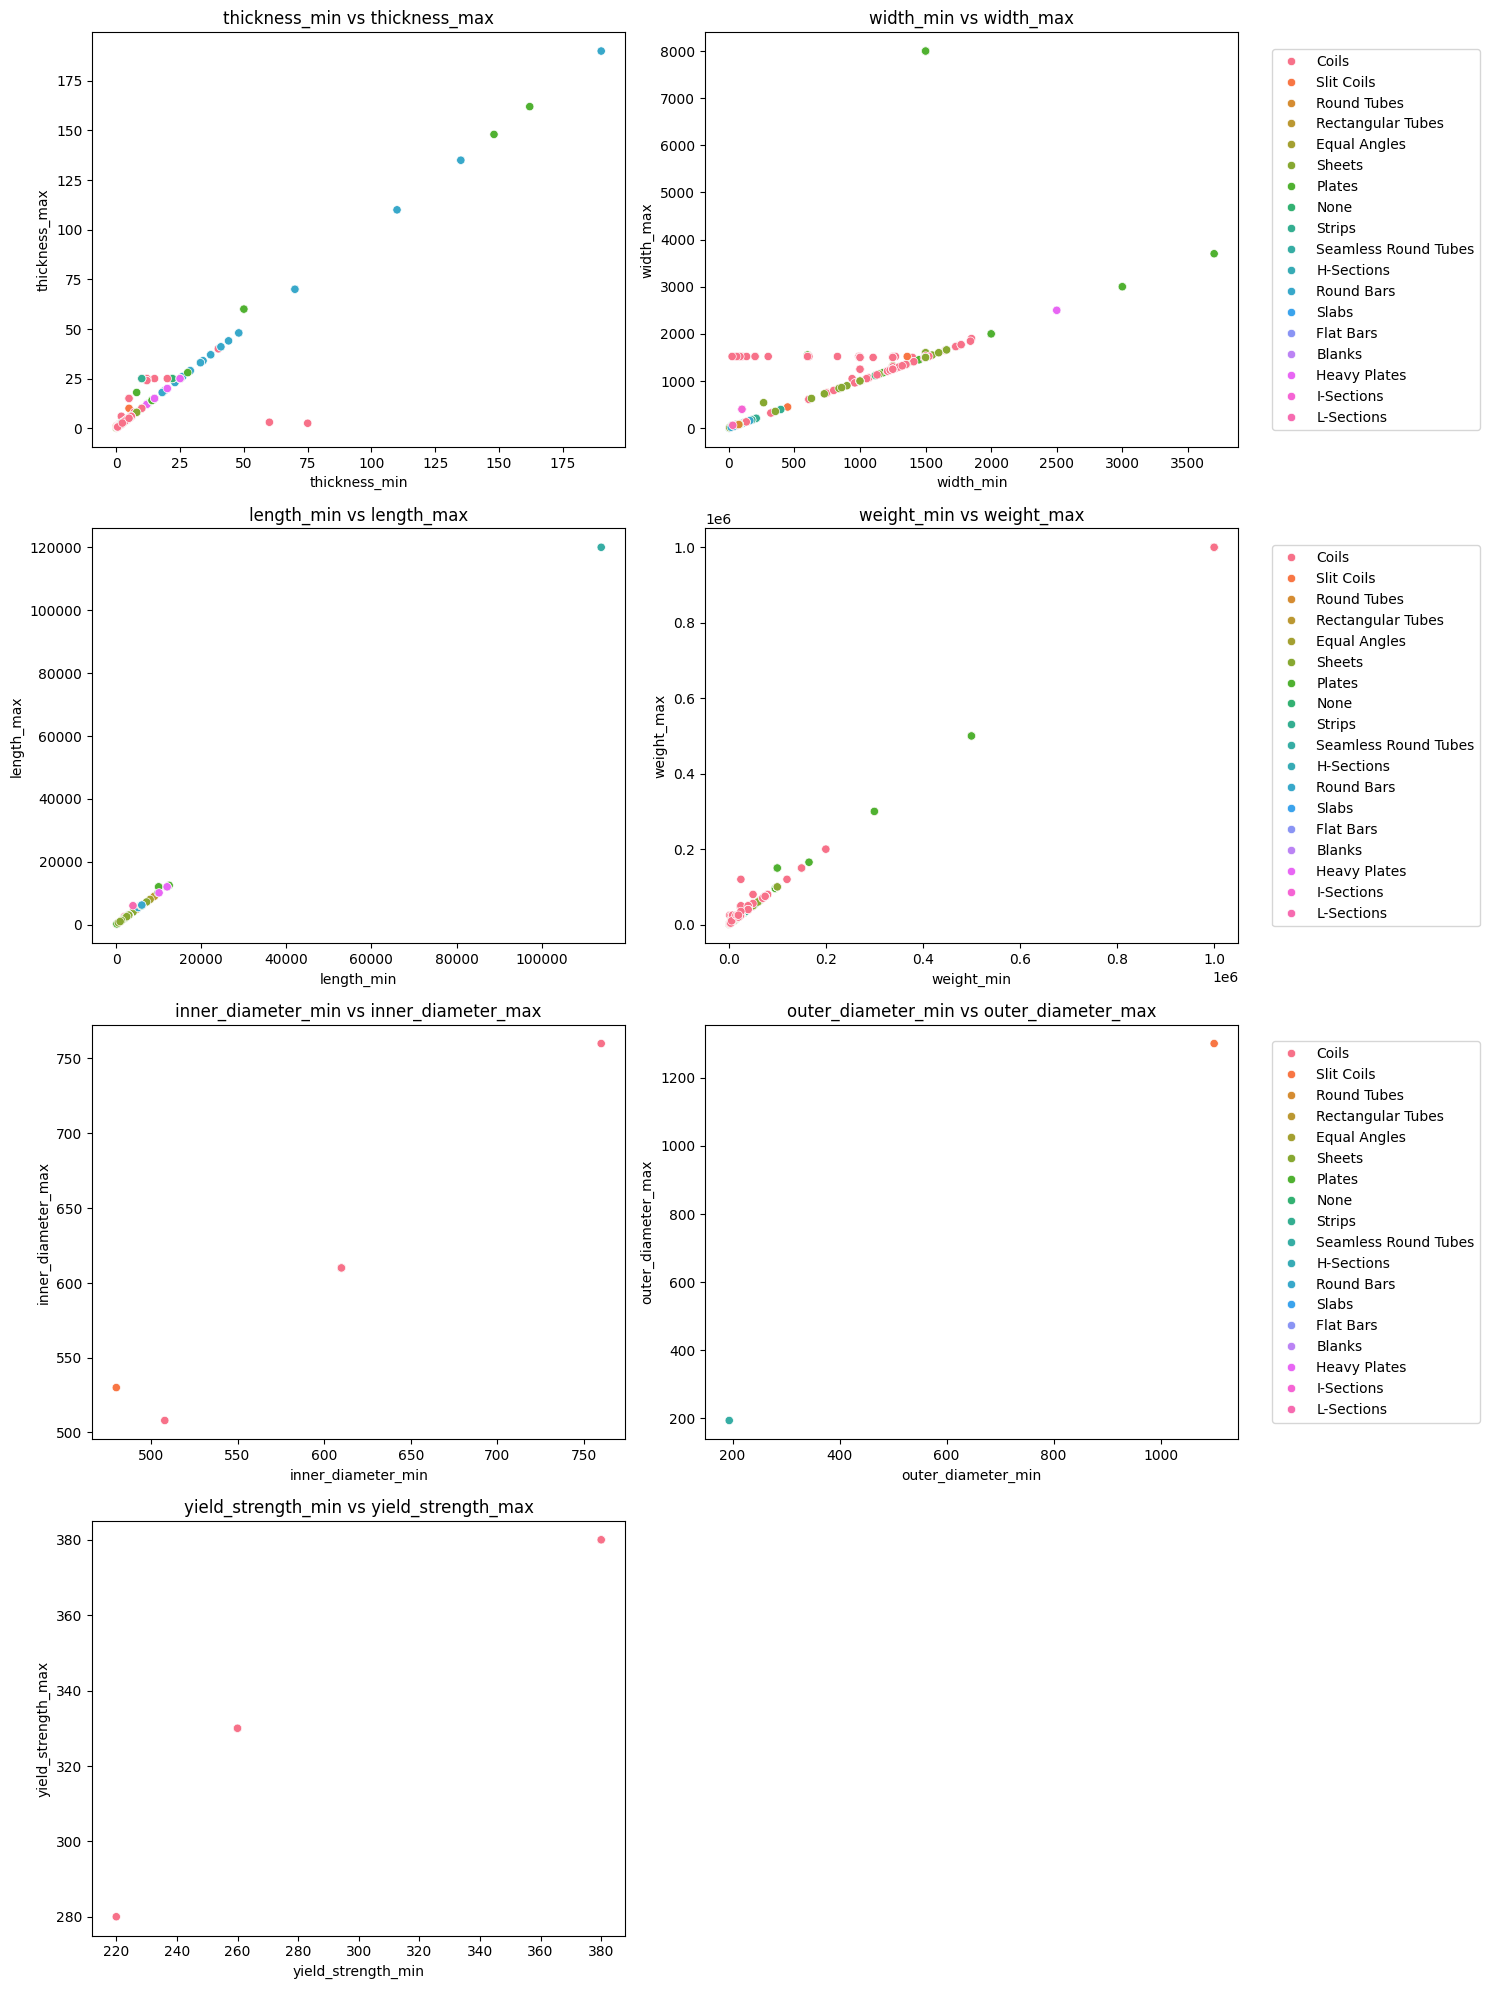

In [524]:
# Define your variable groups
var_groups = [
    ['thickness_min', 'thickness_max'],
    ['width_min', 'width_max'],
    ['length_min', 'length_max'],
    ['weight_min', 'weight_max'],
    ['inner_diameter_min', 'inner_diameter_max'],
    ['outer_diameter_min', 'outer_diameter_max'],
    ['yield_strength_min', 'yield_strength_max']
]

n_cols = 2
n_rows = (len(var_groups) + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*5))
axes = axes.flatten()

# Create plots without legends
for i, vars in enumerate(var_groups):
    sns.scatterplot(data=df_merged, x=vars[0], y=vars[1], hue='form', ax=axes[i], legend=False)
    axes[i].set_title(f"{vars[0]} vs {vars[1]}")

# Remove empty subplots
for i in range(len(var_groups), len(axes)):
    fig.delaxes(axes[i])

# Create a temporary plot to get legend elements
temp_ax = fig.add_subplot(111, frame_on=False)
temp_ax.tick_params(labelcolor="none", bottom=False, left=False)
sns.scatterplot(data=df_merged, x='thickness_min', y='thickness_max', hue='form', ax=temp_ax)
handles, labels = temp_ax.get_legend_handles_labels()
temp_ax.remove()

# Add legends
legend_rows = [1, 3, 5]  
for i, row_idx in enumerate(legend_rows):
    if row_idx < len(axes) and i * 2 < len(var_groups):
        axes[row_idx].legend(handles, labels, bbox_to_anchor=(1.05, 0.5), loc='center left')

plt.tight_layout()
plt.show()

Fix thickness

In [525]:
# wrong thickness spotted (thickness_min > thickness_max)
mask =df_merged[df_merged['thickness_min'] > df_merged['thickness_max']].index
df_merged.loc[mask, ['thickness_min']] = df_merged.loc[mask, ['thickness_max']].values

# Input missing form on the basis of thickness
df_merged.loc[df_merged['thickness_min'] == 22.0, 'form'] = 'Coils'

Clean width

In [526]:
# founded unrealistic width of 8000, I input these values with the width min 
mask = df_merged['width_max'] == 8000
df_merged.loc[mask, 'width_max'] = df_merged.loc[mask, 'width_min']

# I found that all entries with width_max and width_min = 1520 are Coils, I will impute missing form with Coils
df_merged.loc[(df_merged['width_max'] == 1520) & (df_merged['form'] == 'None'), 'form'] = 'Coils'

Clean length

In [527]:
# Fix wrong max and min length by dividing by 10 those > 50000
mask = df_merged['length_min'] > 50000
df_merged.loc[mask, 'length_min'] = df_merged.loc[mask, 'length_min'] / 10
df_merged.loc[mask, 'length_max'] = df_merged.loc[mask, 'length_max'] / 10


Clean Weight

In [528]:
# Some weight are unrealistics. I will divide by 10 those weight > 200000
mask = df_merged['weight_min'] > 200000
df_merged.loc[mask, 'weight_min'] = df_merged.loc[mask, 'weight_min'] / 10
df_merged.loc[mask, 'weight_max'] = df_merged.loc[mask, 'weight_max'] / 10


Singleton dimension

In [529]:
# Manage singleton dimensions 
dimension_cols = [
    'thickness',
    'width',
    'length',
    'weight',
    'inner_diameter',
    'outer_diameter',
    'yield_strength',
    'tensile_strength'
]

def fill_singleton_dimensions(col):
    min_col = f"{col}_min"
    max_col = f"{col}_max"

    # If min is missing and max is present, set min to max
    df_merged.loc[
        df_merged[min_col].isna() & df_merged[max_col].notna(),
        min_col] = df_merged[max_col]

    # If max is missing and min is present, set max to min
    df_merged.loc[
        df_merged[max_col].isna() & df_merged[min_col].notna(),
        max_col] = df_merged[min_col]
    
for col in dimension_cols:
    fill_singleton_dimensions(col)

In [530]:
# save to csv
df_merged.to_csv('outputs/task_2_output.csv', index=False)

# Run Analyses

In [531]:
df_merged.columns

Index(['id', 'grade', 'coating_x', 'finish', 'surface_type',
       'surface_protection', 'form', 'thickness_min', 'thickness_max',
       'width_min', 'width_max', 'length_min', 'length_max', 'weight_min',
       'weight_max', 'inner_diameter_min', 'inner_diameter_max',
       'outer_diameter_min', 'outer_diameter_max', 'yield_strength_min',
       'yield_strength_max', 'tensile_strength_min', 'tensile_strength_max',
       'standards', 'carbon_C', 'manganese_Mn', 'silicon_Si', 'sulfur_S',
       'phosphorus_P', 'chromium_Cr', 'nickel_Ni', 'molybdenum_Mo',
       'vanadium_V', 'aluminum_Al', 'titanium_Ti', 'niobium_Nb', 'boron_B',
       'nitrogen_N', 'tensile_strength_Rm', 'yield_strength_RE_RP0.2',
       'elongation_A%', 'hardness_HB_HV_HRC',
       'impact_toughness_Charpy_V_notch', 'source_pages', 'application',
       'category', 'Nb_V_Ti_others', 'coating_y', 'carbon_C_mid',
       'manganese_Mn_mid', 'silicon_Si_mid', 'sulfur_S_mid',
       'phosphorus_P_mid', 'chromium_Cr_mid

In [532]:
categorical_similarity(df_merged.iloc[1], df_merged.iloc[2])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [535]:
df_merged.columns

Index(['id', 'grade', 'coating_x', 'finish', 'surface_type',
       'surface_protection', 'form', 'thickness_min', 'thickness_max',
       'width_min', 'width_max', 'length_min', 'length_max', 'weight_min',
       'weight_max', 'inner_diameter_min', 'inner_diameter_max',
       'outer_diameter_min', 'outer_diameter_max', 'yield_strength_min',
       'yield_strength_max', 'tensile_strength_min', 'tensile_strength_max',
       'standards', 'carbon_C', 'manganese_Mn', 'silicon_Si', 'sulfur_S',
       'phosphorus_P', 'chromium_Cr', 'nickel_Ni', 'molybdenum_Mo',
       'vanadium_V', 'aluminum_Al', 'titanium_Ti', 'niobium_Nb', 'boron_B',
       'nitrogen_N', 'tensile_strength_Rm', 'yield_strength_RE_RP0.2',
       'elongation_A%', 'hardness_HB_HV_HRC',
       'impact_toughness_Charpy_V_notch', 'source_pages', 'application',
       'category', 'Nb_V_Ti_others', 'coating_y', 'carbon_C_mid',
       'manganese_Mn_mid', 'silicon_Si_mid', 'sulfur_S_mid',
       'phosphorus_P_mid', 'chromium_Cr_mid

In [540]:
# Check grade properties columns sparsity
all_grade_properties_cols = ['carbon_C_mid',
       'manganese_Mn_mid', 'silicon_Si_mid', 'sulfur_S_mid',
       'phosphorus_P_mid', 'chromium_Cr_mid', 'nickel_Ni_mid',
       'molybdenum_Mo_mid', 'vanadium_V_mid', 'aluminum_Al_mid',
       'titanium_Ti_mid', 'niobium_Nb_mid', 'boron_B_mid', 'nitrogen_N_mid',
       'tensile_strength_Rm_mid', 'yield_strength_RE_RP0.2_mid',
       'elongation_A%_mid', 'hardness_HB_HV_HRC_mid', 'Nb_V_Ti_others_mid'
      ]

sparsity = df_merged[all_grade_properties_cols].isnull().mean() * 100
print(sparsity)

grade_properties_cols = [col for col in all_grade_properties_cols if sparsity[col] < 85]


carbon_C_mid                    0.106270
manganese_Mn_mid                0.106270
silicon_Si_mid                 42.826780
sulfur_S_mid                    1.275239
phosphorus_P_mid                1.275239
chromium_Cr_mid                93.304995
nickel_Ni_mid                  97.662062
molybdenum_Mo_mid              95.642933
vanadium_V_mid                 75.876727
aluminum_Al_mid                42.614240
titanium_Ti_mid                75.557917
niobium_Nb_mid                 75.664187
boron_B_mid                    99.256111
nitrogen_N_mid                 85.547290
tensile_strength_Rm_mid         0.212540
yield_strength_RE_RP0.2_mid     1.275239
elongation_A%_mid               2.125399
hardness_HB_HV_HRC_mid         94.580234
Nb_V_Ti_others_mid             88.841658
dtype: float64


In [547]:
def grade_property_similarity(val1, val2, property_col):
    """Calculate similarity for grade properties using midpoints"""
    if pd.isna(val1) or pd.isna(val2):
        return 0.0
    
    # Convert distance to similarity (closer = more similar)
    distance = abs(val1 - val2)
    max_distance = df_merged[property_col].max() - df_merged[property_col].min()  # Use property_col directly
    similarity = 1 - (distance / max_distance) if max_distance > 0 else 1.0
    return similarity

def run_grade_property_similarity(row1, row2, dims=grade_properties_cols):
    cat_matches = []
    for dim in dims:
        val1 = row1[dim]  
        val2 = row2[dim]  
        cat_matches.append(grade_property_similarity(
            val1, val2, dim  # Pass the full column name including '_mid'
        ))
    return sum(cat_matches) / len(cat_matches)


properties_matrix = np.zeros((len(df_merged), len(df_merged)))

for i in range(len(df_merged)):
    for j in range(len(df_merged)):
        if i != j:
            sim = run_grade_property_similarity(df_merged.iloc[i], df_merged.iloc[j])
            properties_matrix[i, j] = sim
        else:
            properties_matrix[i, j] = 1.0

In [549]:
def categorical_similarity(val1, val2):
    if pd.isna(val1) or pd.isna(val2):
        return .5
    else:
        return 1 if val1 == val2 else 0

categorical_cols = ['coating_x', 'finish', 'surface_type', 'surface_protection', 'form']

def run_categorical_similarity(row1, row2, dims=categorical_cols):
    cat_matches = []
    for dim in dims:
        cat_matches.append(categorical_similarity(
            row1[dim], row2[dim]
        ))
    return sum(cat_matches) / len(cat_matches)


categories_matrix = np.zeros((len(df_merged), len(df_merged)))

for i in range(len(df_merged)):
    for j in range(len(df_merged)):
        if i != j:
            sim = run_categorical_similarity(df_merged.iloc[i], df_merged.iloc[j])
            categories_matrix[i, j] = sim
        else:
            categories_matrix[i, j] = 1.0


In [ ]:
def iou_similarity(min1, max1, min2, max2):
    intersection = max(0, min(max1, max2) - max(min1, min2))
    union = max(max1, max2) - min(min1, min2)
    return intersection / union if union > 0 else 0


# Run Analyses
numerical_dims = ['length', 'width', 'thickness', 'weight', 'inner_diameter']

def run_iou_similarity(row1, row2, dims=numerical_dims):
    ious = []
    for dim in dims:
        min_col = f"{dim}_min"
        max_col = f"{dim}_max"
        ious.append(iou_similarity(
            row1[min_col], row1[max_col],
            row2[min_col], row2[max_col]
        ))
    return sum(ious) / len(ious)  

# Compute similarity matrix 
dimensions_matrix = np.zeros((len(df_merged), len(df_merged)))

for i in range(len(df_merged)):
    if i % 20 == 0:
        print(f"Processing row {i}/{len(df_merged)}")
    for j in range(len(df_merged)):
        if i != j:
            sim = iou_similarity(df_merged.iloc[i], df_merged.iloc[j])
            dimensions_matrix[i, j] = sim
        else:
            dimensions_matrix[i, j] = 1.0   


In [551]:
dimensions_matrix[:50, :50]

array([[1.        , 0.2       , 0.30869565, ..., 0.10526316, 0.1       ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.10869565, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.10526316, 0.2       , 0.2       , ..., 1.        , 0.05263158,
        0.        ],
       [0.1       , 0.2       , 0.2       , ..., 0.05263158, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]], shape=(50, 50))

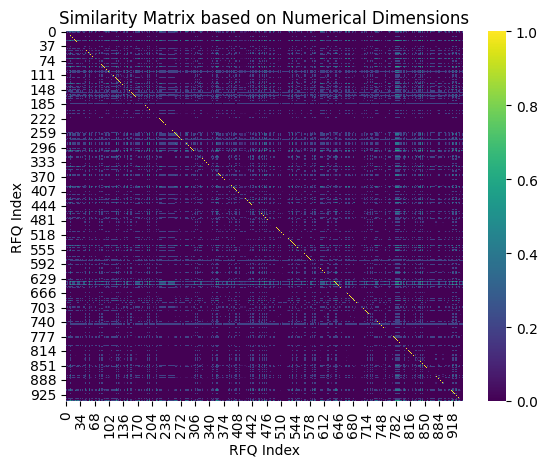

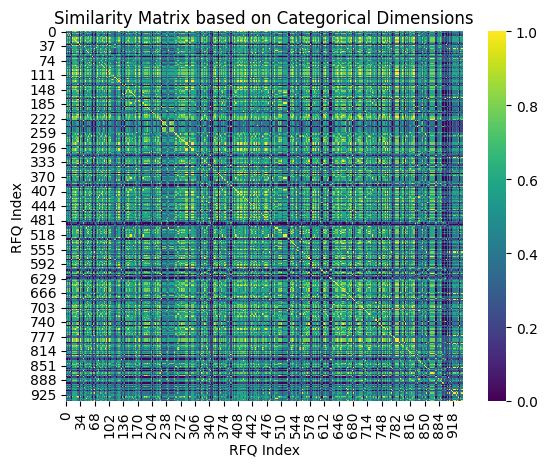

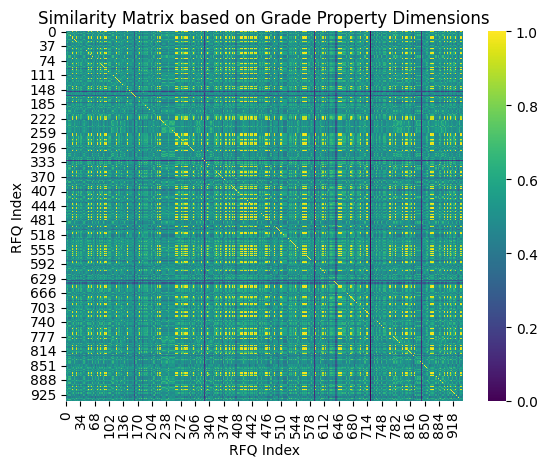

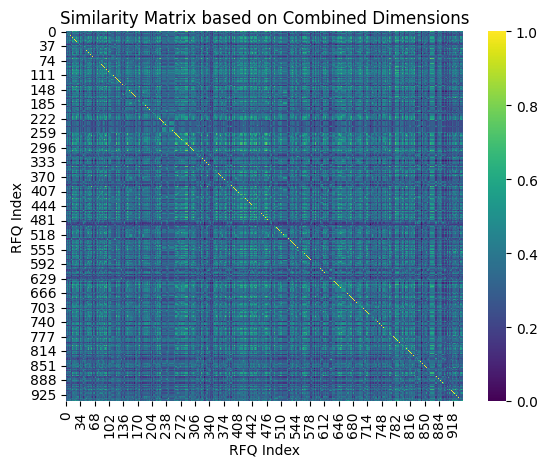

In [552]:
sns.heatmap(dimensions_matrix, cmap='viridis')
plt.title('Similarity Matrix based on Numerical Dimensions')
plt.xlabel('RFQ Index')
plt.ylabel('RFQ Index')
plt.show()

sns.heatmap(categories_matrix, cmap='viridis')
plt.title('Similarity Matrix based on Categorical Dimensions')
plt.xlabel('RFQ Index')
plt.ylabel('RFQ Index')
plt.show()

sns.heatmap(properties_matrix, cmap='viridis')
plt.title('Similarity Matrix based on Grade Property Dimensions')
plt.xlabel('RFQ Index')
plt.ylabel('RFQ Index')
plt.show()

sns.heatmap((dimensions_matrix + categories_matrix + properties_matrix) / 3, cmap='viridis')
plt.title('Similarity Matrix based on Combined Dimensions')
plt.xlabel('RFQ Index')
plt.ylabel('RFQ Index')
plt.show()



In [ ]:
import pandas as pd

def minimal_imputation(df):
    """Only the most reliable imputations"""
    df = df.copy()
    
    # 1. FORM - Most reliable (based on physical dimensions)
    mask = df['form'].isna() | (df['form'] == '')
    for idx in df[mask].index:
        row = df.loc[idx]
        
        # Tube if has diameters
        if pd.notna(row.get('outer_diameter_max', 0)) and row.get('outer_diameter_max', 0) > 0:
            df.loc[idx, 'form'] = 'Tube'
        
        # Sheet/Plate if width >> thickness  
        elif (pd.notna(row.get('thickness_max')) and pd.notna(row.get('width_max')) and
              row.get('width_max', 0) > row.get('thickness_max', 1) * 10):
            df.loc[idx, 'form'] = 'Sheet' if row.get('thickness_max', 0) < 6 else 'Plate'
    
    # 2. COATING - Only when obvious from grade name
    mask = df['coating_x'].isna() | (df['coating_x'] == '')
    for idx in df[mask].index:
        grade = str(df.loc[idx, 'grade']).lower()
        
        if 'galv' in grade or 'zinc' in grade:
            df.loc[idx, 'coating_x'] = 'Galvanized'
        elif any(x in grade for x in ['stainless', '316', '304', '201']):
            df.loc[idx, 'coating_x'] = 'None'  # Stainless doesn't need coating
    
    return df

# Usage:
# df = pd.read_csv('your_file.csv')
# df_imputed = minimal_imputation(df)

In [ ]:
def calculate_IoU(min1, max1, min2, max2):
    """Calculate Intersection over Union for two intervals"""
    if pd.isna(min1) or pd.isna(max1) or pd.isna(min2) or pd.isna(max2):
        return 0.0

    # Intersection
    intersection_min = max(min1, min2)
    intersection_max = min(max1, max2)
    intersection = max(0, intersection_max - intersection_min)

    # Union
    union_min = min(min1, min2)
    union_max = max(max1, max2)
    union = union_max - union_min

    return intersection / union if union > 0 else 0.0